##Get the Data
Import necessary libraries and load the New York City Airbnb dataset.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("./AB_NYC_2019_1.csv")

###Take a Quick Look at the Data
Using head(), info(), describe() to get a sense of the dataset.



In [ ]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Explore the categorical attributes in the dataset using value_counts().

Fill in your code below.

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

Fill in code below.

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

Fill in code below.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48884 entries, 0 to 48883
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48884 non-null  object 
 1   latitude                        48884 non-null  float64
 2   longitude                       48884 non-null  float64
 3   room_type                       48884 non-null  object 
 4   price                           48884 non-null  int64  
 5   minimum_nights                  48884 non-null  int64  
 6   number_of_reviews               48884 non-null  int64  
 7   reviews_per_month               38833 non-null  float64
 8   calculated_host_listings_count  48884 non-null  int64  
 9   availability_365                48884 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


Fill in code below.

In [ ]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000
mean,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498
std,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


###Histogram
Show the histogram of each feature to see the range of the values and distribution.


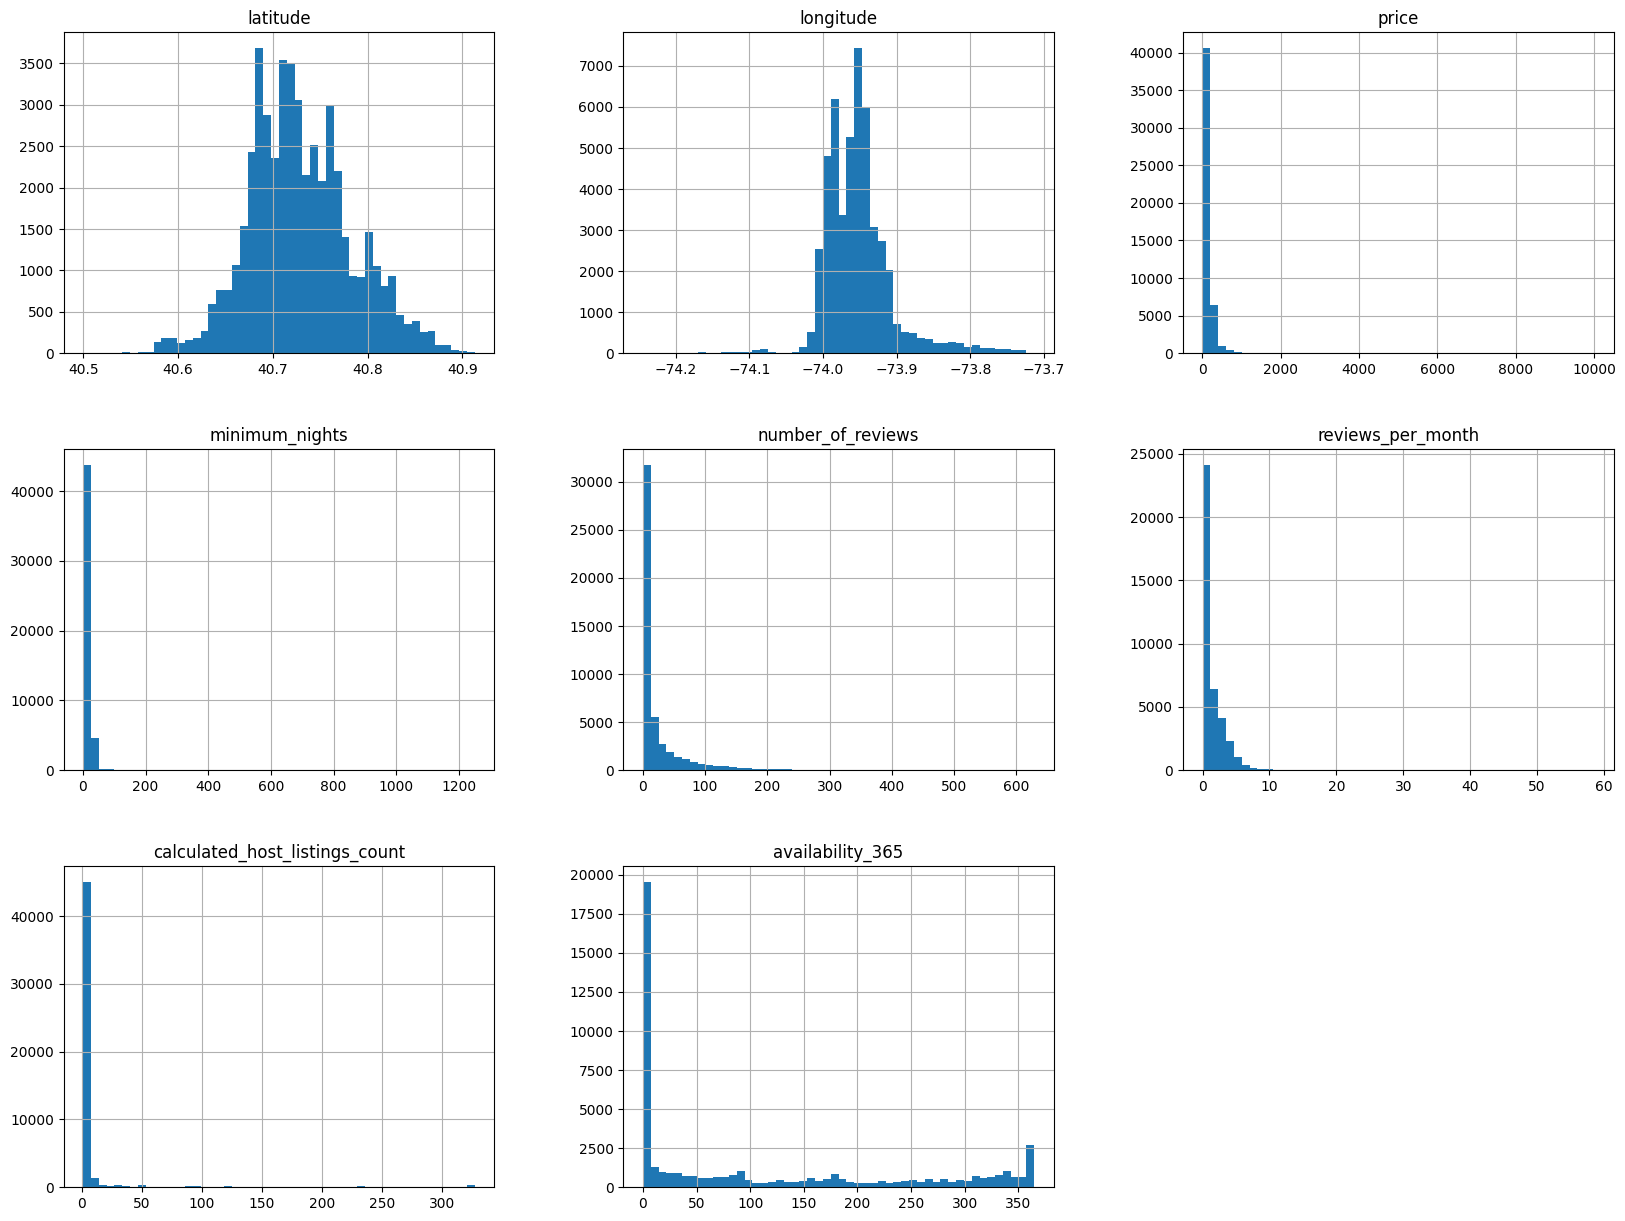

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

###Correlation matrix
Understand the correlation of the various features with the price.

In [ ]:
corr_matrix = df.corr(numeric_only = True)

Fill in your code below.

In [ ]:
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
availability_365                  0.081847
calculated_host_listings_count    0.057462
minimum_nights                    0.042805
latitude                          0.033899
reviews_per_month                -0.030575
number_of_reviews                -0.047926
longitude                        -0.149954
Name: price, dtype: float64

We see that one feature is more correlated with price. It is longitude, which has a significant negative correlation with price. In the following, we will particularly look into the correlation.


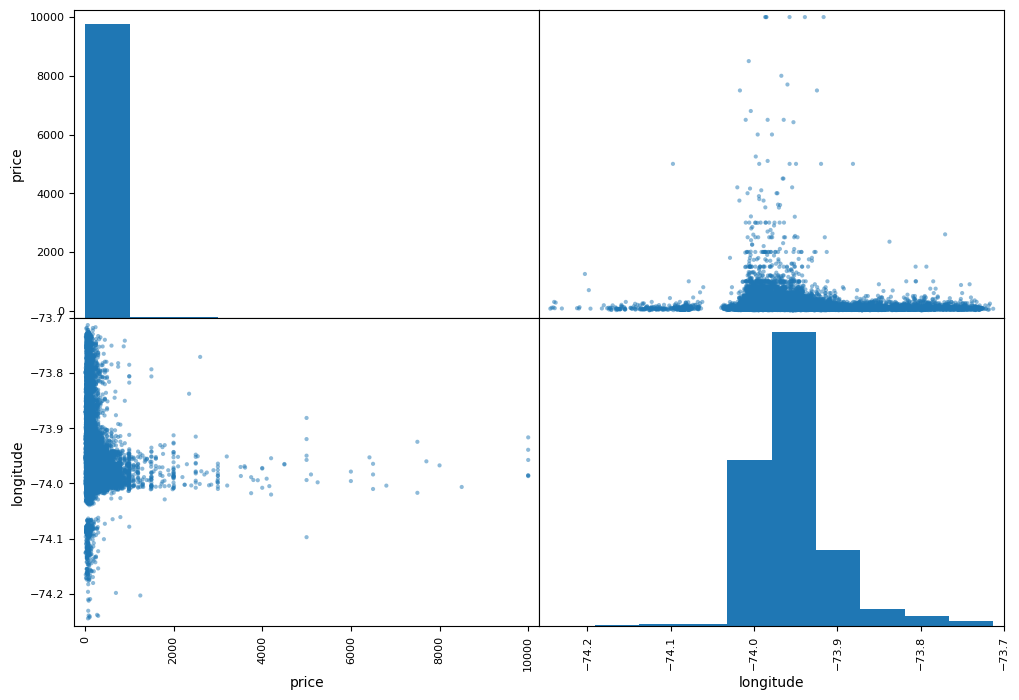

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["price", "longitude"]
scatter_matrix(df[attributes], figsize=(12,8));

##Create a Test Set
We use 20% of the data for testing and the rest for training. Since neighbourhood_group is an important feature, we use neighbourhood_group to conduct a stratified split.


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["neighbourhood_group"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [ ]:
strat_test_set["neighbourhood_group"].value_counts()/len(strat_test_set)

Manhattan        0.443081
Brooklyn         0.411067
Queens           0.115884
Bronx            0.022297
Staten Island    0.007671
Name: neighbourhood_group, dtype: float64

In [ ]:
df["neighbourhood_group"].value_counts()/len(df)

Manhattan        0.443090
Brooklyn         0.411075
Queens           0.115907
Bronx            0.022298
Staten Island    0.007630
Name: neighbourhood_group, dtype: float64

In [ ]:
strat_test_set.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
43306,Manhattan,40.73571,-73.99694,Private room,425,1,0,NaN,2,353
2922,Queens,40.59684,-73.79449,Private room,35,2,201,3.28,2,88
39578,Manhattan,40.74692,-73.97548,Private room,70,30,1,0.16,1,172
45814,Manhattan,40.74751,-73.98051,Entire home/apt,300,30,0,NaN,8,355
7652,Manhattan,40.77260,-73.97928,Shared room,68,3,105,2.09,1,302


##Prepare the Data for Machine Learning Algorithms
Drop the label from the training and testing sets, and verify that we indeed have dropped it successfully.

In [ ]:
housing = strat_train_set.drop("price", axis=1) # drop labels for training set
housing_labels = strat_train_set["price"].copy()

In [ ]:
housing.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
40275,Queens,40.68996,-73.74882,Private room,2,6,1.01,3,85
45402,Queens,40.76187,-73.82169,Private room,1,9,4.91,6,365
8028,Brooklyn,40.71178,-73.95684,Entire home/apt,15,27,0.68,1,173
43463,Queens,40.76308,-73.82215,Private room,2,1,1.00,2,0
43412,Manhattan,40.77961,-73.97821,Private room,2,3,1.13,1,61


In [ ]:
housing_labels.head()

40275    147
45402     69
8028      90
43463     63
43412    160
Name: price, dtype: int64

### Data Cleaning

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
14678,Manhattan,40.71469,-73.99950,Entire home/apt,4,0,NaN,1,0
39014,Brooklyn,40.69076,-73.91296,Private room,30,0,NaN,103,236
9219,Brooklyn,40.67505,-73.98045,Private room,3,0,NaN,1,0
21857,Queens,40.76964,-73.92303,Private room,10,0,NaN,1,188
48717,Manhattan,40.72388,-73.98354,Entire home/apt,1,0,NaN,1,35


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
housing_num = housing.drop(["neighbourhood_group", "room_type"], axis=1)

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([ 40.72328, -73.95575,   3.     ,   5.     ,   0.71   ,   1.     ,
        44.     ])

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns, index=housing_num.index)

In [ ]:
housing_tr.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000
mean,40.729014,-73.952352,7.033600,23.376122,1.233795,7.313064,112.688087
std,0.054537,0.045933,20.247694,44.741109,1.498895,33.531340,131.647215
min,40.499790,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690150,-73.983080,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723280,-73.955750,3.000000,5.000000,0.710000,1.000000,44.000000
75%,40.763140,-73.936445,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,1250.000000,629.000000,27.950000,327.000000,365.000000


### Handling Text and Categorical Attributes


In [ ]:
housing_cat = housing[["neighbourhood_group", "room_type"]]

In [ ]:
housing_cat.head(10)

,neighbourhood_group,room_type
40275,Queens,Private room
45402,Queens,Private room
8028,Brooklyn,Entire home/apt
43463,Queens,Private room
43412,Manhattan,Private room
18630,Brooklyn,Entire home/apt
48127,Manhattan,Entire home/apt
43135,Brooklyn,Entire home/apt
42151,Brooklyn,Private room
29627,Manhattan,Entire home/apt


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_1hot

<39107x8 sparse matrix of type '<class 'numpy.float64'>'
	with 78214 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [ ]:
housing_cat_1hot.toarray()[0]

array([0., 0., 0., 1., 0., 0., 1., 0.])

In [ ]:
housing_cat_1hot.toarray().shape

(39107, 8)

In [ ]:
cat_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]

###Pipleline.
Now we prepare a pipeline that includes two steps: (i) imputing and (ii) scaling.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

array([[-0.71611725,  4.43117559, -0.24860434, ..., -0.14930885,
        -0.1286295 , -0.21032303],
       [ 0.60245943,  2.84469698, -0.29799331, ...,  2.45264051,
        -0.03915981,  1.91660067],
       [-0.31601513, -0.0977016 ,  0.3934523 , ..., -0.3694738 ,
        -0.18827595,  0.45813871],
       ...,
       [ 0.28615505, -0.49045683,  1.13428688, ..., -0.7497587 ,
         1.33270867,  1.50640824],
       [-0.92111916,  0.7653149 , -0.29799331, ...,  5.74844302,
        -0.15845272,  0.93669654],
       [-0.52578453,  0.51516204, -0.24860434, ...,  0.51118599,
        -0.18827595, -0.43820771]])

###Use one hot encoding for categorical data and get the full pipeline
Finally, the prepared data is stored in housing_prepared.


In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["neighbourhood_group", "room_type"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
print(cat_attribs)
print(num_attribs)

['neighbourhood_group', 'room_type']
['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
housing_prepared

array([[-0.71611725,  4.43117559, -0.24860434, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60245943,  2.84469698, -0.29799331, ...,  0.        ,
         1.        ,  0.        ],
       [-0.31601513, -0.0977016 ,  0.3934523 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.28615505, -0.49045683,  1.13428688, ...,  1.        ,
         0.        ,  0.        ],
       [-0.92111916,  0.7653149 , -0.29799331, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52578453,  0.51516204, -0.24860434, ...,  0.        ,
         1.        ,  0.        ]])

##Training models
We will try two basic models: linear and decision tree first.

###Linear model.


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
#print(some_data_prepared)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [  3.45365047  78.52613298 188.50964179  10.36465658 131.16046988]


In [ ]:
print("Labels:", list(some_labels))

Labels: [147, 69, 90, 63, 160]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

231.59821570035524

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

73.41438983347821

RMSE is more sensitive to outliers.
RMSE penalises large errors more than MAE due to the fact that errors are squared initially.
MAE returns values that are more interpretable as it is simply the average of absolute error.

We deciced to use MAE for our problem.

###Decision tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_absolute_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Model fine-tuning

###Cross validation (CV).
Use 10-fold CV on the linear model to obtain mae for each fold and the mean mae.


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_absolute_error", cv=10)
tree_mae_scores = (-scores)
print(scores)

[-101.83917157  -89.52288417  -88.21759141  -80.646382    -83.19151112
  -84.62618256  -86.36972641  -88.87237852  -92.97953964  -86.27928389]


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_mae_scores)

Scores: [101.83917157  89.52288417  88.21759141  80.646382    83.19151112
  84.62618256  86.36972641  88.87237852  92.97953964  86.27928389]
Mean: 88.25446512917532
Standard deviation: 5.594614277997171


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_absolute_error", cv=10)
lin_mae_scores = -lin_scores
display_scores(lin_mae_scores)

Scores: [73.41304975 77.28688345 75.96888133 69.88577086 73.05349485 72.84727631
 71.0940583  73.54146167 74.76586899 72.63737033]
Mean: 73.44941158238451
Standard deviation: 2.0553035261144728


### Random forest.
We see from above that the prediction from the linear model is not very good, while the decision tree that we used earlier on leads to overfitting. Now we are going to try an ensemble approach, random forest based regressor.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mae = mean_absolute_error(housing_labels, housing_predictions)
forest_mae

24.948758534277754

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_absolute_error", cv=10)
forest_mae_scores = -forest_scores
display_scores(forest_mae_scores)

Scores: [71.16941192 71.3156584  70.05915367 63.52376374 66.89231143 63.99781386
 65.42948862 67.29745013 67.22200256 67.10176982]
Mean: 67.4008824142804
Standard deviation: 2.5977647887765376


###We see that random forest leads to lower mae than linear model.

In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_absolute_error", cv=10)
pd.Series(-scores).describe()

count    10.000000
mean     73.449412
std       2.166480
min      69.885771
25%      72.689847
50%      73.233272
75%      74.459767
max      77.286883
dtype: float64

In [ ]:
pd.Series(forest_mae_scores).describe()

count    10.000000
mean     67.400882
std       2.738285
min      63.523764
25%      65.795194
50%      67.161886
75%      69.368728
max      71.315658
dtype: float64

In [ ]:
pd.Series(tree_mae_scores).describe()

count     10.000000
mean      88.254465
std        5.897241
min       80.646382
25%       85.039458
50%       87.293659
75%       89.360258
max      101.839172
dtype: float64

In [ ]:
pd.Series(lin_mae_scores).describe()

count    10.000000
mean     73.449412
std       2.166480
min      69.885771
25%      72.689847
50%      73.233272
75%      74.459767
max      77.286883
dtype: float64

###Grid search: tuning hyperparameters.
Now we will use grid search to find better parameters.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [ ]:
cvres = grid_search.cv_results_
print(cvres)

{'mean_fit_time': array([0.23779173, 0.53094196, 1.54304209, 0.19823527, 0.65867906,
       2.14400573, 0.29378953, 1.02443519, 2.85828352, 0.33069606,
       1.26305785, 3.52083025, 0.31335344, 0.71205978, 0.23759284,
       0.81866632, 0.51020346, 1.02053061]), 'std_fit_time': array([0.02970818, 0.10934099, 0.29860073, 0.00495528, 0.00818182,
       0.19732316, 0.04797857, 0.18405862, 0.36803014, 0.002684  ,
       0.20897215, 0.22425513, 0.00189909, 0.08892733, 0.00847348,
       0.01482537, 0.12235753, 0.06116713]), 'mean_score_time': array([0.0156745 , 0.03238544, 0.09318099, 0.01065745, 0.03099079,
       0.09463196, 0.01192365, 0.03150554, 0.09135952, 0.01051536,
       0.03294039, 0.09230332, 0.01367803, 0.03696146, 0.01196632,
       0.03700194, 0.0229775 , 0.03798308]), 'std_score_time': array([0.00516114, 0.00297812, 0.0049367 , 0.0003729 , 0.00051904,
       0.00824503, 0.00159271, 0.00158345, 0.00194601, 0.00029622,
       0.00260044, 0.00589048, 0.00035993, 0.00126137, 0.

In [ ]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

75.19578766431331 {'max_features': 2, 'n_estimators': 3}
68.43688981297885 {'max_features': 2, 'n_estimators': 10}
65.59763511485407 {'max_features': 2, 'n_estimators': 30}
75.74147837698906 {'max_features': 4, 'n_estimators': 3}
69.46954983497685 {'max_features': 4, 'n_estimators': 10}
66.0443355043639 {'max_features': 4, 'n_estimators': 30}
74.79246704634366 {'max_features': 6, 'n_estimators': 3}
69.13114199191831 {'max_features': 6, 'n_estimators': 10}
67.04325914811884 {'max_features': 6, 'n_estimators': 30}
76.13441959728058 {'max_features': 8, 'n_estimators': 3}
69.62708846668968 {'max_features': 8, 'n_estimators': 10}
67.1099190520601 {'max_features': 8, 'n_estimators': 30}
75.06693325547255 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
68.91989718166947 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
74.80903531127286 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
68.56786291179137 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.237792,0.029708,0.015674,0.005161,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-77.058766,-75.997954,...,-75.195788,1.386923,16,-29.505215,-31.057631,-30.507085,-29.985670,-30.845234,-30.380167,0.567895
1,0.530942,0.109341,0.032385,0.002978,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-69.720647,-68.323217,...,-68.436890,1.267542,5,-27.041694,-27.300857,-27.167369,-27.394828,-27.180992,-27.217148,0.120952
2,1.543042,0.298601,0.093181,0.004937,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-67.285450,-65.694495,...,-65.597635,1.189277,1,-24.876487,-25.516290,-25.355535,-25.680765,-25.184308,-25.322677,0.277498
3,0.198235,0.004955,0.010657,0.000373,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-80.214651,-73.273417,...,-75.741478,2.876142,17,-30.192584,-30.324213,-30.248769,-30.990784,-30.469976,-30.445265,0.288206
4,0.658679,0.008182,0.030991,0.000519,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-70.882677,-69.504359,...,-69.469550,1.080481,10,-27.147170,-27.568618,-27.265503,-27.571856,-27.476606,-27.405951,0.170687
5,2.144006,0.197323,0.094632,0.008245,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-68.369509,-65.923926,...,-66.044336,1.468481,2,-25.216796,-25.759259,-25.674259,-25.862864,-25.345116,-25.571659,0.248101
6,0.293790,0.047979,0.011924,0.001593,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-76.854811,-76.054675,...,-74.792467,1.384196,12,-30.611038,-30.751212,-30.726694,-30.078288,-30.237305,-30.480908,0.272710
7,1.024435,0.184059,0.031506,0.001583,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-71.742649,-68.949757,...,-69.131142,1.459900,9,-28.058060,-27.537414,-27.653912,-27.559455,-27.208115,-27.603391,0.272691
8,2.858284,0.368030,0.091360,0.001946,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-69.893045,-66.402412,...,-67.043259,1.603825,3,-25.579612,-25.840815,-25.805532,-25.724236,-25.592988,-25.708637,0.106888
9,0.330696,0.002684,0.010515,0.000296,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-80.112972,-77.075343,...,-76.134420,2.329523,18,-30.756092,-30.115987,-31.202785,-30.380990,-30.232532,-30.537677,0.396374


###Now we will use randomized search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794cf3ae8d90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794cf3ae9120>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

65.664669156494 {'max_features': 7, 'n_estimators': 180}
67.6607368463943 {'max_features': 5, 'n_estimators': 15}
64.81952713853116 {'max_features': 3, 'n_estimators': 72}
67.01719973771604 {'max_features': 5, 'n_estimators': 21}
65.78442155789173 {'max_features': 7, 'n_estimators': 122}
64.81260776047186 {'max_features': 3, 'n_estimators': 75}
64.71702678700771 {'max_features': 3, 'n_estimators': 88}
65.2477954257051 {'max_features': 5, 'n_estimators': 100}
64.48687431417818 {'max_features': 3, 'n_estimators': 150}
78.51205141825383 {'max_features': 5, 'n_estimators': 2}


It turns out that the random search obtains better results than the grid search.

We can find the relative importance of each attribute for making accurate predictions:

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.22762141, 0.25645071, 0.11137921, 0.05373247, 0.07718434,
       0.06031462, 0.129312  , 0.00050812, 0.00608509, 0.01145925,
       0.00364239, 0.00127442, 0.03547215, 0.0233731 , 0.00219071])

Let's display the importance scores next to their corresponding attribute names:

In [ ]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0]) + list(cat_encoder.categories_[1])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.25645071274327425, 'longitude'),
 (0.22762141152267262, 'latitude'),
 (0.1293119974985129, 'availability_365'),
 (0.11137921040788086, 'minimum_nights'),
 (0.07718434466546106, 'reviews_per_month'),
 (0.0603146215514653, 'calculated_host_listings_count'),
 (0.05373247407973237, 'number_of_reviews'),
 (0.03547214712308473, 'Entire home/apt'),
 (0.023373100497773983, 'Private room'),
 (0.011459248327803612, 'Manhattan'),
 (0.00608508848377279, 'Brooklyn'),
 (0.0036423850471720637, 'Queens'),
 (0.0021907138000698432, 'Shared room'),
 (0.0012744216882592458, 'Staten Island'),
 (0.0005081225630644824, 'Bronx')]

##Evaluate model on the Test Set



In [ ]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mae = mean_absolute_error(y_test, final_predictions)

In [ ]:
final_mae

64.99003811991538

Let's have some more detailed look at the predictions. First we look at the differences.

In [ ]:
diff = final_predictions - y_test

In [ ]:
pd.Series(diff).describe()

count    9777.000000
mean        1.113111
std       200.038700
min     -9828.386667
25%       -12.033333
50%        13.100000
75%        42.320000
max      1767.180000
Name: price, dtype: float64

<Axes: >

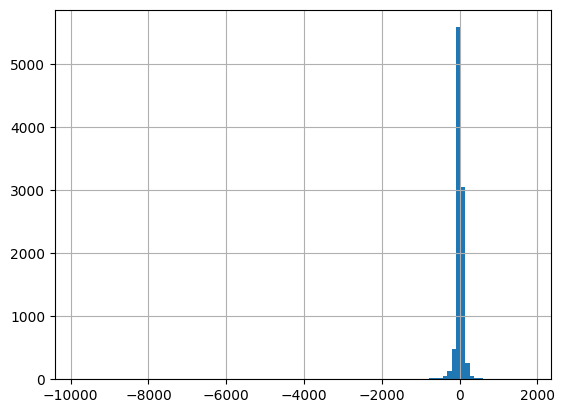

In [ ]:
pd.Series(diff).hist(bins=100)

Next, we obtain the 95% of the middle predictions and examine them.

In [ ]:
import pandas as pd

# Step 1: Sort the Series
sorted_series = pd.Series(diff).sort_values()

# Step 2: Calculate the start and end indices for the middle 95 percent
total_elements = len(sorted_series)
start_index = int(total_elements * 0.025)  # Start index of the middle 95%
end_index = int(total_elements * 0.975)    # End index of the middle 95%

# Step 3: Slice the Series to get the middle 95 percent of data
middle_95_percent_data = sorted_series[start_index:end_index]

middle_95_percent_data.describe()


count    9288.000000
mean       11.059296
std        57.582476
min      -227.446667
25%        -9.803333
50%        13.100000
75%        40.068333
max       172.926667
Name: price, dtype: float64

<Axes: >

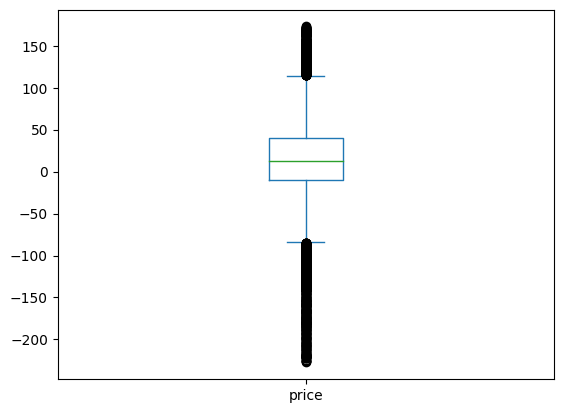

In [ ]:
middle_95_percent_data.plot.box()

Next, we look at the absolute diffrences. We can see that most of time, the errors are within 29 dollars.

In [ ]:
abs(middle_95_percent_data).describe()

count    9288.000000
mean       41.873535
std        41.042430
min         0.000000
25%        12.005000
50%        28.260000
75%        57.888333
max       227.446667
Name: price, dtype: float64

<Axes: >

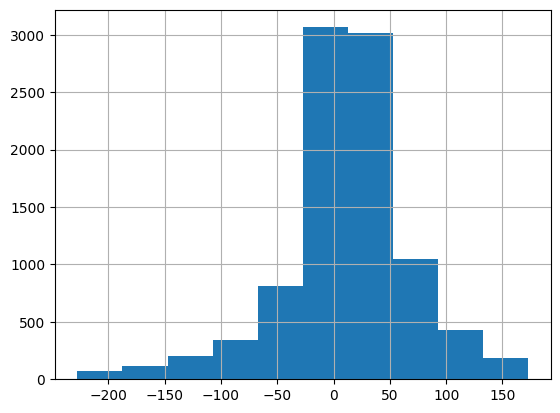

In [ ]:
middle_95_percent_data.hist()